# Basis eksempel - hente CSV fra SSB til pandas
## Enkel figur basert på et lite datasett fra SSBs API:ferdige datasett
### Henter [sesongjustert detaljomsetningsindeks](https://data.ssb.no/api/v0/dataset/1066) som CSV 


In [1]:
# Importerer Python Pandas for å kunne lage dataframe
import pandas as pd

Adressen til datasettet legges i API_URL

In [2]:
API_URL = "https://data.ssb.no/api/v0/dataset/1066.csv?lang=no"

pd.read_csv() henter innholdet fra API-et og legger det i data. 
De norske datasettene her er semikolonseparert med komma som desimaltegn.
CSV er ikke UTF-8, så vi må angi parameter for encoding for å få ÆØÅ riktig. 

In [3]:
data = pd.read_csv(API_URL, sep=';', decimal=',', encoding = "ISO-8859-1" )

Sjekker at datatypen er Pandas dataframe

In [4]:
type(data)

pandas.core.frame.DataFrame

Shape gir antall rader (13) og kolonner (4)

In [5]:
data.shape

(13, 4)

Toppen av datasettet. Verdikolonnen har tittelen på uttrekket.

In [6]:
data.head()

,næring,måned,statistikkvariabel,"07129: Varehandelsindeksen, etter næring, måned og statistikkvariabel"
0,"47 Detaljhandel, unntatt salg av motorvogner",2023M09,"Volumindeks, sesongjustert",92.3
1,"47 Detaljhandel, unntatt salg av motorvogner",2023M10,"Volumindeks, sesongjustert",92.6
2,"47 Detaljhandel, unntatt salg av motorvogner",2023M11,"Volumindeks, sesongjustert",92.9
3,"47 Detaljhandel, unntatt salg av motorvogner",2023M12,"Volumindeks, sesongjustert",92.1
4,"47 Detaljhandel, unntatt salg av motorvogner",2024M01,"Volumindeks, sesongjustert",92.1


Endrer til datoformat ved først å erstatte M med - . Ikke strengt nødvendig. Ta vekk kommentaren og kjør på nytt. Hva er endringen i figurene?

In [7]:
# data['måned']= pd.to_datetime(data['måned'].str.replace('M', '-')).dt.stroftime('

Setter måned som index-kolonne

In [8]:
data.index = data['måned']

Informasjon om innholdet i dataframe

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 2023M09 to 2024M09
Data columns (total 4 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   næring                                                                 13 non-null     object 
 1   måned                                                                  13 non-null     object 
 2   statistikkvariabel                                                     13 non-null     object 
 3   07129: Varehandelsindeksen, etter næring, måned og statistikkvariabel  13 non-null     float64
dtypes: float64(1), object(3)
memory usage: 520.0+ bytes


Lage et linjediagram der vi angir x og y aksen

<Axes: xlabel='måned'>

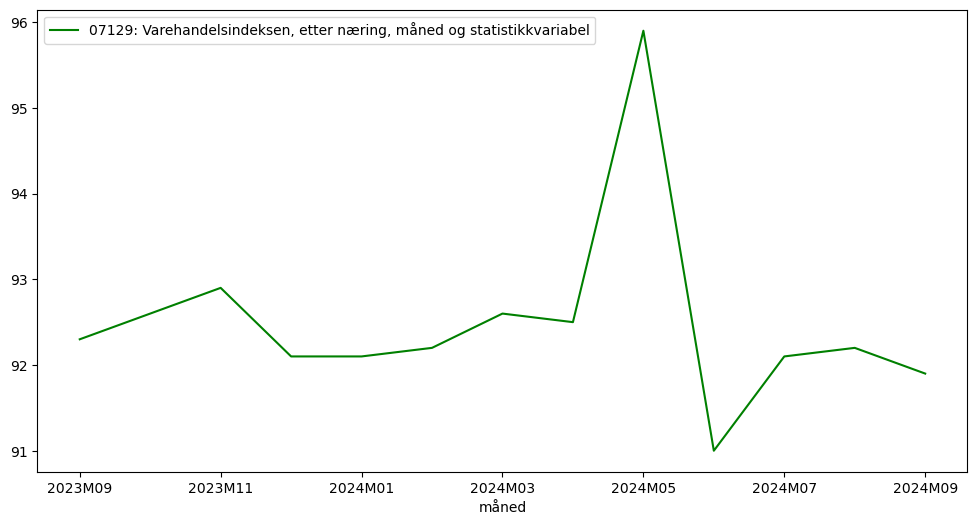

In [10]:
data.plot(x='måned', y='07129: Varehandelsindeksen, etter næring, måned og statistikkvariabel', figsize=(12, 6), color ='g')

*Alternativ*: Legger index (måned) og verdier  til et serie objekt, data_serie.

In [11]:
data_serie = data['07129: Varehandelsindeksen, etter næring, måned og statistikkvariabel']

plot av data_serie med standardverdier

<Axes: xlabel='måned'>

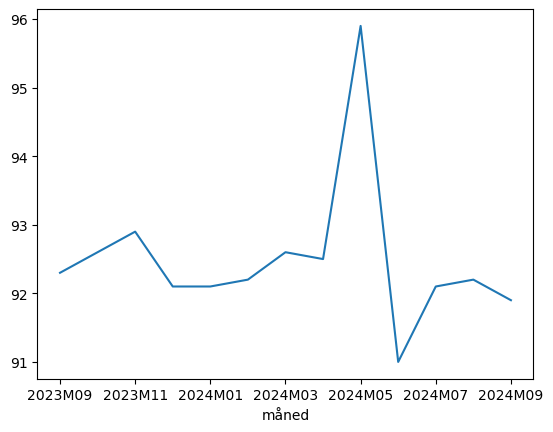

In [12]:
data_serie.plot()

*Note*: Fram til 2021 var dette en egen svært enkel indeks fra SSB, Detaljomsetningsindeksen. Den var fin for enkle eksempler. I 2022 ble Detaljomsetningindeksen utvidet med flere næringsgrupper (45 og 46) og detaljert med undergupper. Navnet på Statistikkbanktabellen ble endret til Varehandelsindeksen. Selve datasettet, 1066, er ikke endret.  